## <center>BERT NLP</center>

BERT fait appel à Transformer, un mécanisme d’attention qui apprend les relations contextuelles entre les mots (ou les sous-mots) d’un texte. Dans sa forme classique, Transformer comprend deux mécanismes distincts : un encodeur qui lit le texte en entrée et un décodeur qui produit une prédiction pour la tâche. Puisque l’objectif de BERT est de générer un modèle de langage, seul le mécanisme d’encodage est nécessaire. Le fonctionnement détaillé de Transformer est décrit dans un article de Google.

Contrairement aux modèles directionnels, qui lisent le texte entré de manière séquentielle (de gauche à droite ou de droite à gauche), l’encodeur Transformer lit la séquence entière de mots en une seule fois. Il est donc considéré comme bidirectionnel, bien qu’il serait plus exact de dire qu’il est non directionnel. Cette caractéristique permet au modèle d’apprendre le contexte d’un mot en se basant sur tout son environnement (à gauche et à droite du mot).

In [1]:
import pandas as pd
df = pd.read_csv('../data/data.csv')
df.head()

Unnamed: 0.1  Unnamed: 0         filename  \
0             0           0  img_0000000.jpg   
1             1           1  img_0000001.jpg   
2             2           2  img_0000002.jpg   
3             3           3  img_0000003.jpg   
4             4           4  img_0000004.jpg   

                                                 url  \
0  https://templates.invoicehome.com/modele-factu...   
1  https://templates.invoicehome.com/modele-factu...   
2  https://www.coover.fr/wp-content/uploads/2021/...   
3  https://templates.invoicehome.com/modele-factu...   
4  https://files.intum.com/v/vosfactures/files/31...   

                                         description     type  \
0  100 modèles gratuits de factures | Téléchargem...  facture   
1  100 modèles gratuits de factures | Téléchargem...  facture   
2  Facture proforma : modèle à télécharger gratui...  facture   
3  100 modèles gratuits de factures | Téléchargem...  facture   
4  Base de Connaissances - Vos Factures - Créer u...  facture   

                  filepath  scraped     old_filename  \
0  ./final/img_0000000.jpg        1  img_0000000.jpg   
1  ./final/img_0000001.jpg        1  img_0000001.jpg   
2  ./final/img_0000002.jpg        1  img_0000002.jpg   
3  ./final/img_0000003.jpg        1  img_0000003.jpg   
4  ./final/img_0000004.jpg        1  img_0000004.jpg   

                old_filepath  ...  \
0  ./facture/img_0000000.jpg  ...   
1  ./facture/img_0000001.jpg  ...   
2  ./facture/img_0000002.jpg  ...   
3  ./facture/img_0000003.jpg  ...   
4  ./facture/img_0000004.jpg  ...   

                                            text_ocr  words_count  \
0   FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...           98   
1   Joanna Binet 48 Coubertin 31400 Paris FACTURE...           97   
2   FACTURE Mon entreprise : Nom de la société Ad...           45   
3   Joanna Binet 48 Coubertin 31400 Paris FACTURE...           99   
4   Payer en ligne > FACTURE No SFIDELI F/05.2020...          157   

                                             text_en  \
0  Invoice Logo Joanna Binet Coubertin Paris Invo...   
1  Joanna Binet Coubertin Paris Invoice Invoice i...   
2  Invoice My company : Company name Mail address...   
3  Joanna Binet Coubertin Paris Bill To Cinderell...   
4  Pay online Invoice No Sfideli F/ Creation date...   

                                             text_fr  \
0   Facture Logo Joanna Binet  Coubertin  Paris F...   
1   Joanna Binet  Coubertin  Paris Facture Factur...   
2   Facture Mon entreprise : Nom de la société Ad...   
3   Joanna Binet  Coubertin  Paris Facture À Cend...   
4   Payer en ligne  Facture No Sfideli F/ Date de...   

                                        text_fr_norm  \
0  facture logo joanna binet coubertin paris fact...   
1  joanna binet coubertin paris facture facturé c...   
2  facture entreprise société adresse postale adr...   
3  joanna binet coubertin paris facture cendrillo...   
4  payer ligne facture sfideli date création date...   

                                        text_en_norm  target_en target_fr  \
0  invoice logo joanna binet coubertin paris invo...    invoice   facture   
1  joanna binet coubertin paris invoice invoice c...    invoice   facture   
2  invoice company company name mail address tele...    invoice   facture   
3  joanna binet coubertin paris bill cinderella a...    invoice   facture   
4  online invoice sfideli creation date validity ...    invoice   facture   

    target target_min  
0  invoice    invoice  
1  invoice    invoice  
2  invoice    invoice  
3  invoice    invoice  
4  invoice    invoice  

[5 rows x 27 columns]

**We'll analyze only the en and fr languages**


In [2]:
df = df.dropna(subset = ['text_fr'])
df.shape

(1098, 27)

**Tokenizer**

Nous utiliserons le BertTokenizerFast pré-entraîné. Dans cette étude, nous ne tiendrons pas compte des caractères minuscules et majuscules présents. Pour cette raison, nous convertirons toutes les séquences en caractères minuscules grâce au paramètre do_lower_case.

In [3]:
from transformers import BertTokenizerFast, BertForSequenceClassification

model = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model, do_lower_case=True)

In [4]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
df['target'] = labelencoder.fit_transform(df['target_en'])
df.head()

Unnamed: 0.1  Unnamed: 0         filename  \
0             0           0  img_0000000.jpg   
1             1           1  img_0000001.jpg   
2             2           2  img_0000002.jpg   
3             3           3  img_0000003.jpg   
4             4           4  img_0000004.jpg   

                                                 url  \
0  https://templates.invoicehome.com/modele-factu...   
1  https://templates.invoicehome.com/modele-factu...   
2  https://www.coover.fr/wp-content/uploads/2021/...   
3  https://templates.invoicehome.com/modele-factu...   
4  https://files.intum.com/v/vosfactures/files/31...   

                                         description     type  \
0  100 modèles gratuits de factures | Téléchargem...  facture   
1  100 modèles gratuits de factures | Téléchargem...  facture   
2  Facture proforma : modèle à télécharger gratui...  facture   
3  100 modèles gratuits de factures | Téléchargem...  facture   
4  Base de Connaissances - Vos Factures - Créer u...  facture   

                  filepath  scraped     old_filename  \
0  ./final/img_0000000.jpg        1  img_0000000.jpg   
1  ./final/img_0000001.jpg        1  img_0000001.jpg   
2  ./final/img_0000002.jpg        1  img_0000002.jpg   
3  ./final/img_0000003.jpg        1  img_0000003.jpg   
4  ./final/img_0000004.jpg        1  img_0000004.jpg   

                old_filepath  ...  \
0  ./facture/img_0000000.jpg  ...   
1  ./facture/img_0000001.jpg  ...   
2  ./facture/img_0000002.jpg  ...   
3  ./facture/img_0000003.jpg  ...   
4  ./facture/img_0000004.jpg  ...   

                                            text_ocr  words_count  \
0   FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...           98   
1   Joanna Binet 48 Coubertin 31400 Paris FACTURE...           97   
2   FACTURE Mon entreprise : Nom de la société Ad...           45   
3   Joanna Binet 48 Coubertin 31400 Paris FACTURE...           99   
4   Payer en ligne > FACTURE No SFIDELI F/05.2020...          157   

                                             text_en  \
0  Invoice Logo Joanna Binet Coubertin Paris Invo...   
1  Joanna Binet Coubertin Paris Invoice Invoice i...   
2  Invoice My company : Company name Mail address...   
3  Joanna Binet Coubertin Paris Bill To Cinderell...   
4  Pay online Invoice No Sfideli F/ Creation date...   

                                             text_fr  \
0   Facture Logo Joanna Binet  Coubertin  Paris F...   
1   Joanna Binet  Coubertin  Paris Facture Factur...   
2   Facture Mon entreprise : Nom de la société Ad...   
3   Joanna Binet  Coubertin  Paris Facture À Cend...   
4   Payer en ligne  Facture No Sfideli F/ Date de...   

                                        text_fr_norm  \
0  facture logo joanna binet coubertin paris fact...   
1  joanna binet coubertin paris facture facturé c...   
2  facture entreprise société adresse postale adr...   
3  joanna binet coubertin paris facture cendrillo...   
4  payer ligne facture sfideli date création date...   

                                        text_en_norm  target_en target_fr  \
0  invoice logo joanna binet coubertin paris invo...    invoice   facture   
1  joanna binet coubertin paris invoice invoice c...    invoice   facture   
2  invoice company company name mail address tele...    invoice   facture   
3  joanna binet coubertin paris bill cinderella a...    invoice   facture   
4  online invoice sfideli creation date validity ...    invoice   facture   

   target target_min  
0       7    invoice  
1       7    invoice  
2       7    invoice  
3       7    invoice  
4       7    invoice  

[5 rows x 27 columns]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_en'].astype(str).values.tolist(), df['target'].values.tolist(), test_size=0.2,random_state=1234)


In [6]:
max_length=512
X_train_encoded = tokenizer(X_train, truncation=True, padding=True, max_length=max_length)
X_test_encoded = tokenizer(X_test, truncation=True, padding=True, max_length=max_length)

### Modélisation

Maintenant que notre jeu de données est fin prêt, nous allons choisir un modèle disponible depuis la bibliothèque transformer pour commencer la modélisation. Hugging Face instancie de nombreux modèles tels que BERT, GPT2, RoBERTa...

Pour cette étape, nous utiliserons le fameux modèle BERT. Ce fameux transfomer bi-directionnel a été proposé en premier lieu dans le papier de recherche BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. Ce modèle est conçu pour être pré-entraîné sur des représentations bi-directionelles à partir d'un texte non labélisé en conditionnant sur le contexte de droite et de gauche (bi-directionnel) sur chaque couche du modèle.

L'avantage principal de ce modèle est qu'il peut tout simplement être ajusté (fine-tuning) en ajoutant une simple couche de sortie dépendamment de la tâche désirée (question answering, inférence...) sans pour autant modifier la structure principale du modèle.

In [7]:
target = df['target_en'].unique().tolist()
target

['invoice',
 'id piece',
 'residence proof',
 'passport',
 'pay',
 'postcard',
 'form',
 'scientific publication',
 'advertisement',
 'letter',
 'resume',
 'specification',
 'handwritten',
 'memo',
 'budget',
 'news article',
 'scientific report',
 'email',
 'presentation',
 'questionnaire',
 'file folder']

In [8]:
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(target))

training_args = TrainingArguments(
    output_dir='./results',          # chemin de stockage des résultats
    num_train_epochs=3,              # nombre d'époques pour l'entraînement
    per_device_train_batch_size=8,  # batch size pour l'entraînement
    per_device_eval_batch_size=20,   # batch size pour l'évaluation du modèle
    warmup_steps=500,                # nombre d'étapes pour le pas d'apprentissage
    weight_decay=0.01,               # paramètre décidant des poids
    logging_dir='./logs',            # chemin de stockage des logs
    # utilisation du meilleur modèle à l'issu de l'entraînement
    load_best_model_at_end=True,
    logging_steps=400,               # log & enregistrer les poids à chaque étape
    save_steps=400,
    evaluation_strategy="steps",     # évaluation à chaque `logging_steps`
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [9]:
import torch


class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = NewsGroupsDataset(X_train_encoded, y_train)
test_dataset = NewsGroupsDataset(X_test_encoded, y_test)



In [10]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)
trainer.train()
trainer.evaluate()

***** Running training *****
  Num examples = 878
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 330




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 220
  Batch size = 20


{'eval_loss': 1.3756959438323975,
 'eval_runtime': 323.8895,
 'eval_samples_per_second': 0.679,
 'eval_steps_per_second': 0.034,
 'epoch': 3.0}

In [11]:
model.save_pretrained("../model/bert_nlp")

Configuration saved in ../model/bert_nlp\config.json
Model weights saved in ../model/bert_nlp\pytorch_model.bin


In [12]:
y_pred = trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 220
  Batch size = 20


In [13]:
import numpy as np
y_pred = np.argmax(y_pred.predictions, axis=-1)


In [16]:
y_test

[7,
 13,
 13,
 12,
 6,
 12,
 16,
 6,
 1,
 14,
 13,
 1,
 12,
 5,
 1,
 7,
 8,
 4,
 20,
 5,
 4,
 5,
 6,
 11,
 12,
 17,
 19,
 7,
 14,
 13,
 13,
 6,
 2,
 12,
 12,
 12,
 12,
 18,
 12,
 10,
 6,
 11,
 2,
 4,
 17,
 12,
 13,
 9,
 13,
 5,
 18,
 13,
 6,
 19,
 14,
 7,
 13,
 19,
 10,
 1,
 6,
 6,
 12,
 12,
 13,
 11,
 11,
 12,
 7,
 0,
 6,
 12,
 12,
 5,
 13,
 12,
 17,
 6,
 4,
 6,
 10,
 8,
 1,
 13,
 12,
 8,
 13,
 4,
 12,
 13,
 12,
 9,
 0,
 0,
 7,
 5,
 12,
 9,
 5,
 9,
 13,
 10,
 4,
 11,
 6,
 12,
 12,
 13,
 6,
 17,
 11,
 6,
 0,
 5,
 8,
 6,
 0,
 11,
 14,
 7,
 11,
 11,
 14,
 19,
 7,
 16,
 13,
 12,
 15,
 13,
 11,
 8,
 17,
 15,
 6,
 13,
 12,
 12,
 11,
 12,
 6,
 13,
 12,
 0,
 12,
 6,
 14,
 7,
 7,
 12,
 13,
 18,
 13,
 11,
 13,
 7,
 12,
 7,
 6,
 2,
 15,
 9,
 12,
 17,
 19,
 13,
 10,
 6,
 7,
 13,
 12,
 15,
 14,
 12,
 4,
 13,
 6,
 7,
 6,
 16,
 5,
 2,
 11,
 11,
 14,
 13,
 13,
 11,
 7,
 8,
 11,
 14,
 1,
 13,
 15,
 13,
 17,
 1,
 8,
 16,
 1,
 13,
 12,
 16,
 12,
 12,
 11,
 5,
 12,
 10,
 13,
 12,
 19,
 18,
 12,
 18,
 2,


In [22]:
from sklearn.metrics import classification_report
target_test = labelencoder.inverse_transform(y_test)
target_pred = labelencoder.inverse_transform(y_pred)
#target_test = [target[i] for i in y_test]
#target_pred = [target[i] for i in y_pred]
print( classification_report(target_test, target_pred) )

                        precision    recall  f1-score   support

         advertisement       0.00      0.00      0.00         7
                budget       1.00      0.25      0.40         8
                 email       1.00      1.00      1.00         5
                  form       0.50      0.14      0.22         7
           handwritten       0.40      0.60      0.48        10
              id piece       1.00      0.87      0.93        23
               invoice       0.61      0.93      0.74        15
                letter       0.00      0.00      0.00         7
                  memo       0.19      1.00      0.31         5
          news article       0.60      0.50      0.55         6
              passport       1.00      0.59      0.74        17
                   pay       0.91      0.82      0.86        39
              postcard       0.60      0.91      0.72        32
          presentation       0.00      0.00      0.00         9
         questionnaire       1.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


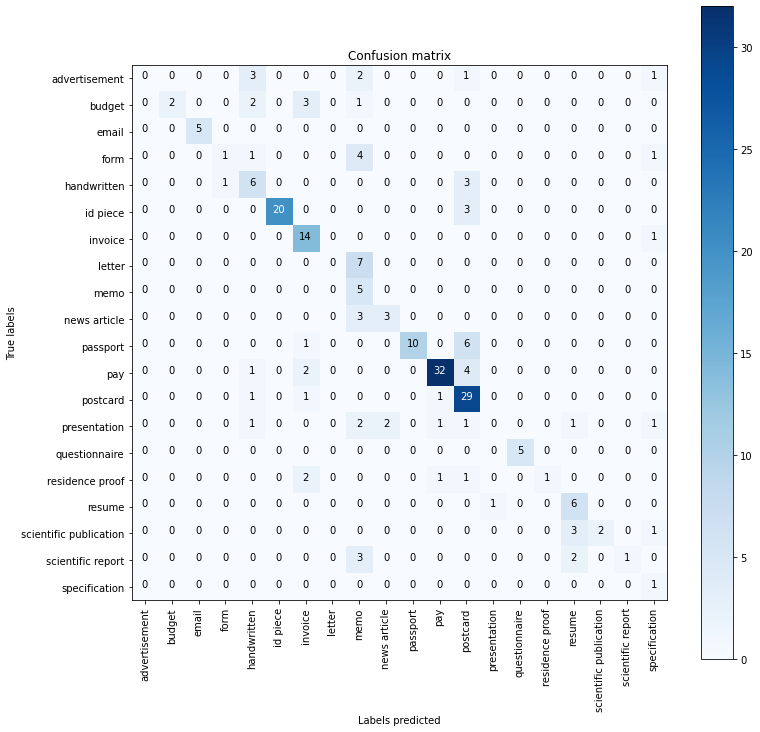

In [25]:
from helpers import confusion_matrix
confusion_matrix(pd.Series(target_test), pd.Series(target_pred))

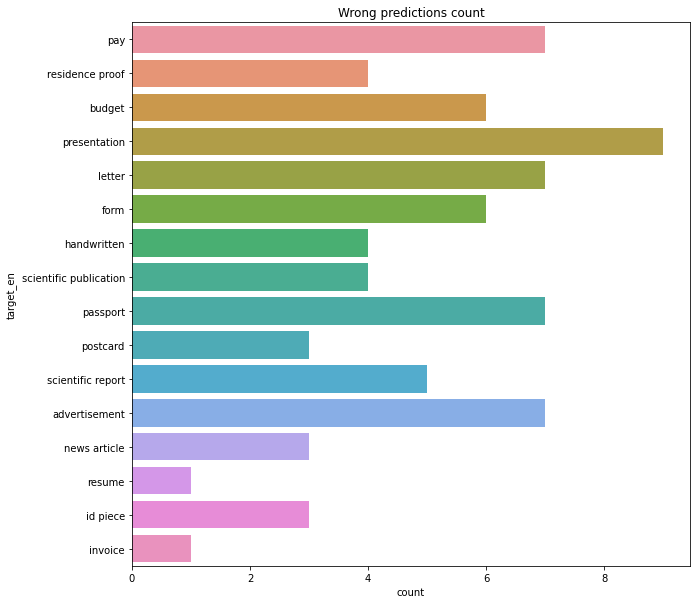

## Wrong predictions for presentation

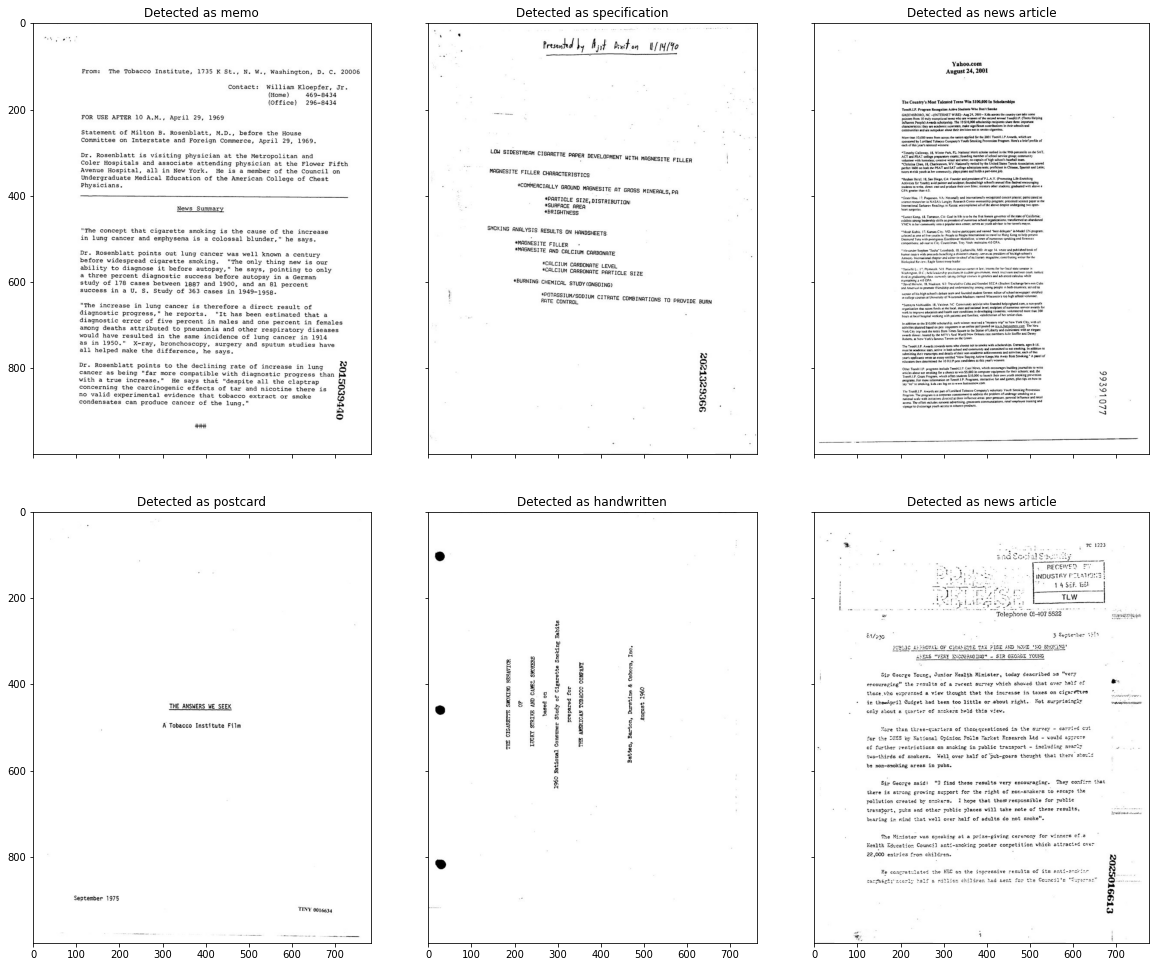

## Wrong predictions for pay

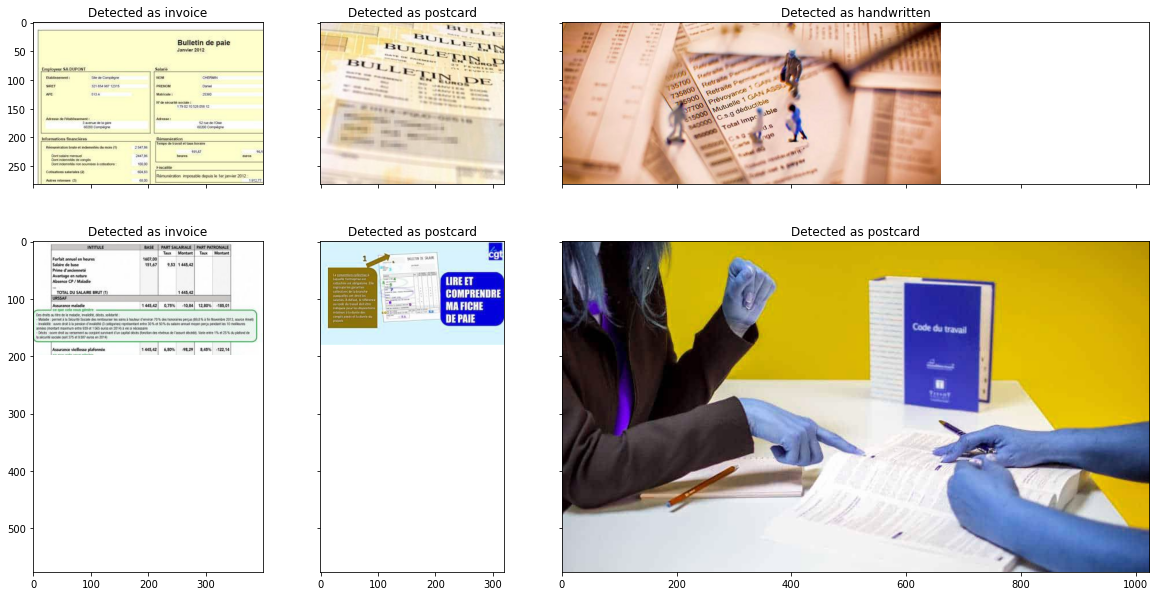

## Wrong predictions for letter

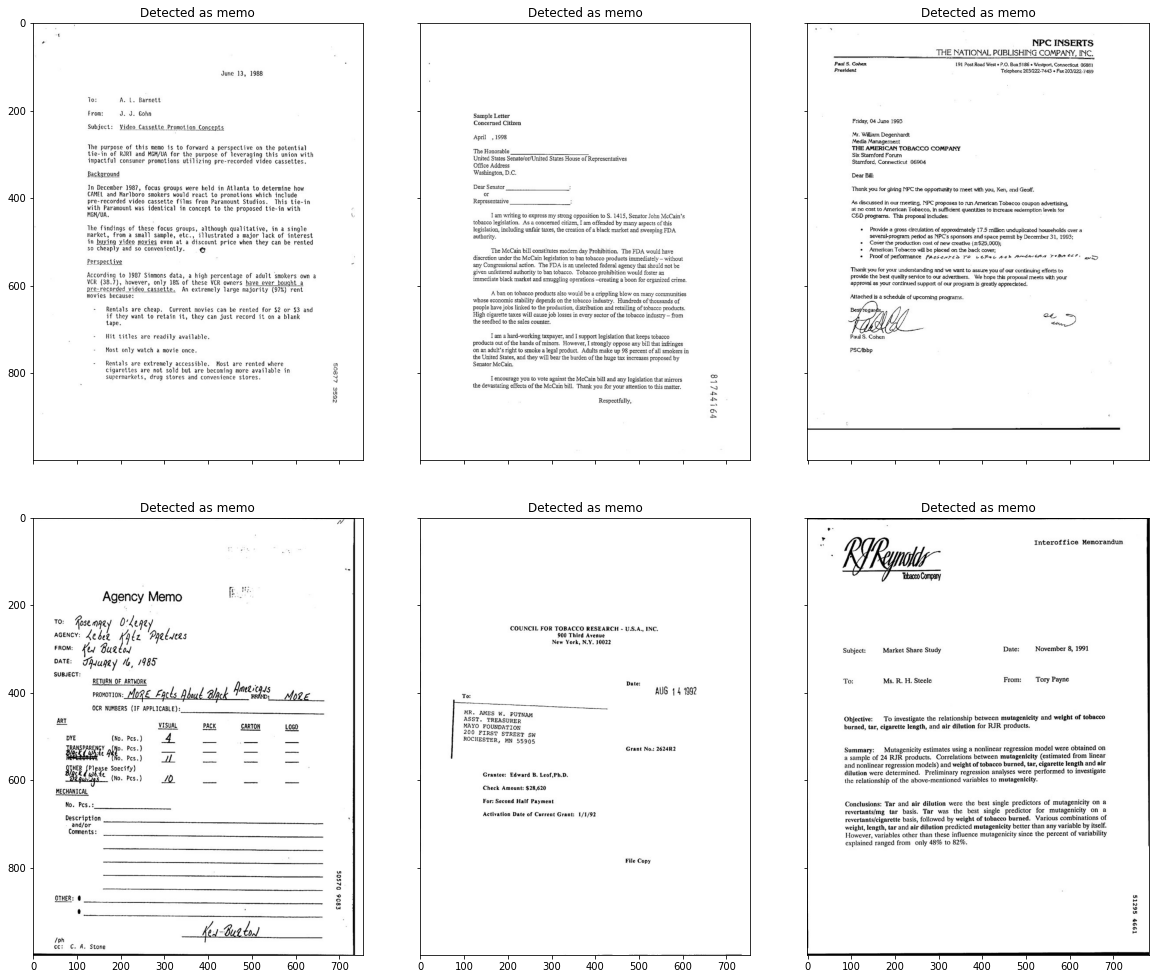

## Wrong predictions for passport

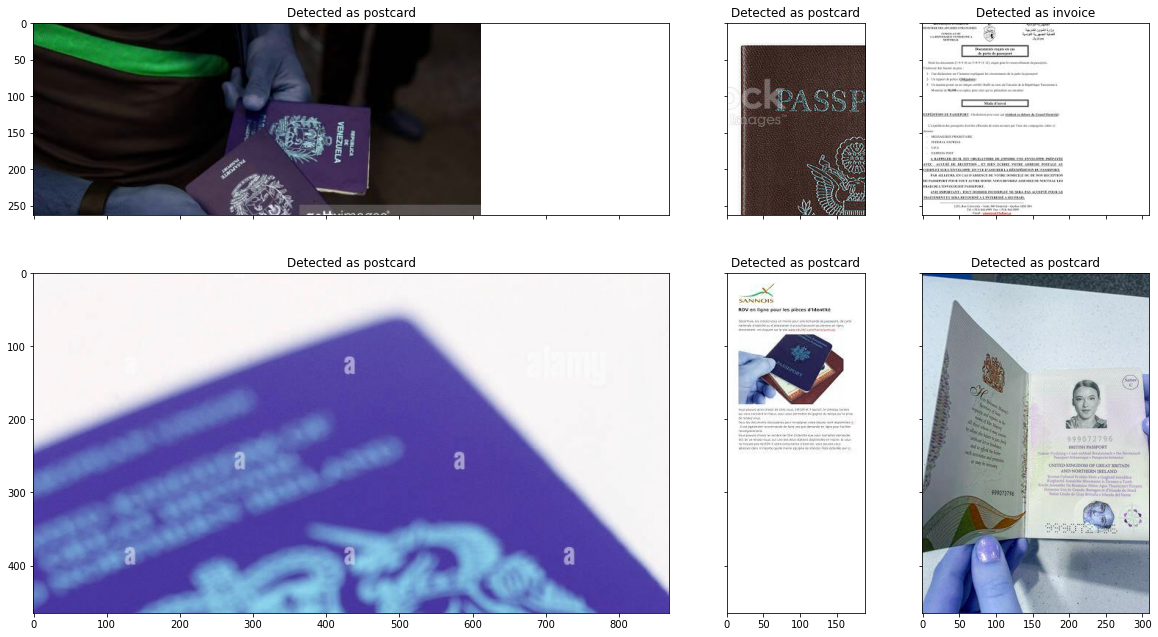

## Wrong predictions for advertisement

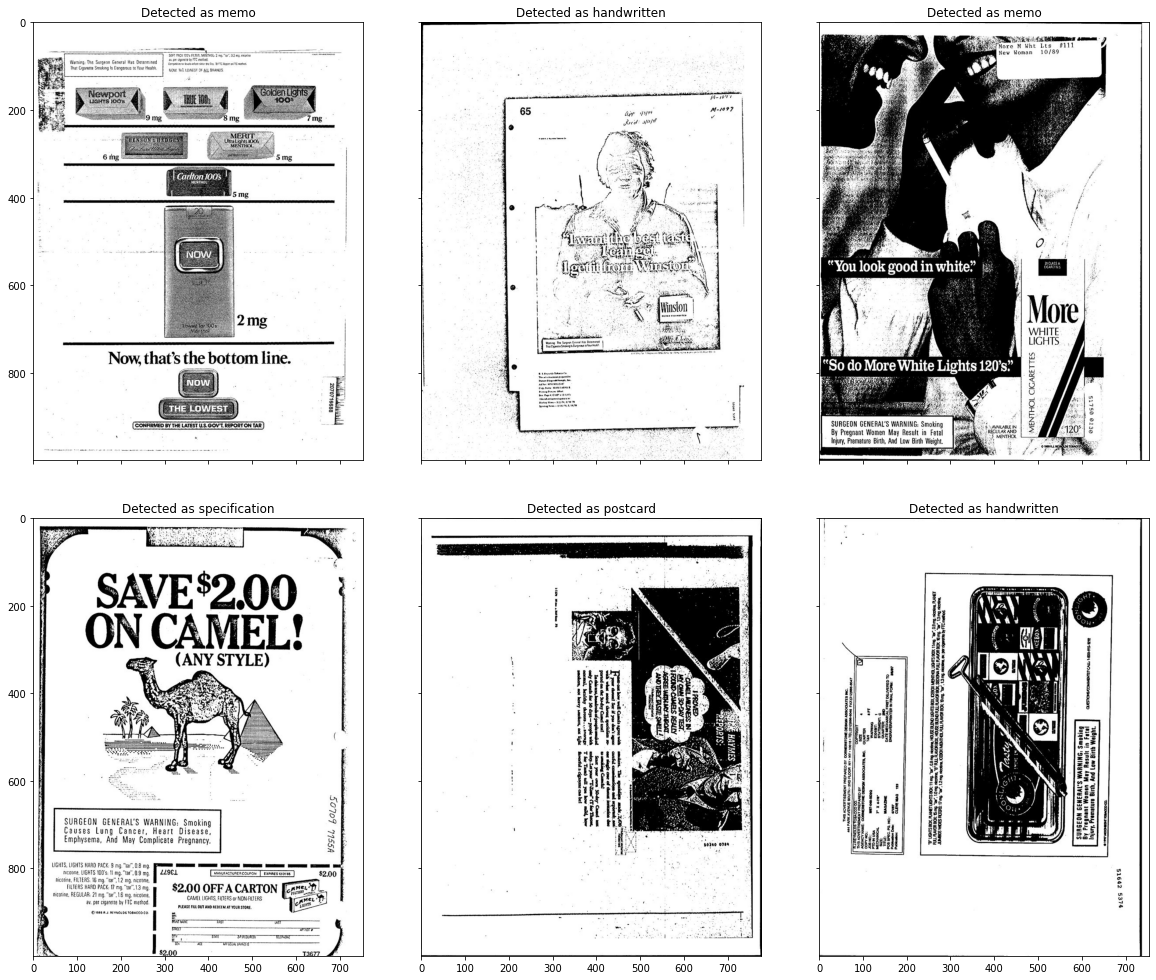

## Wrong predictions for budget

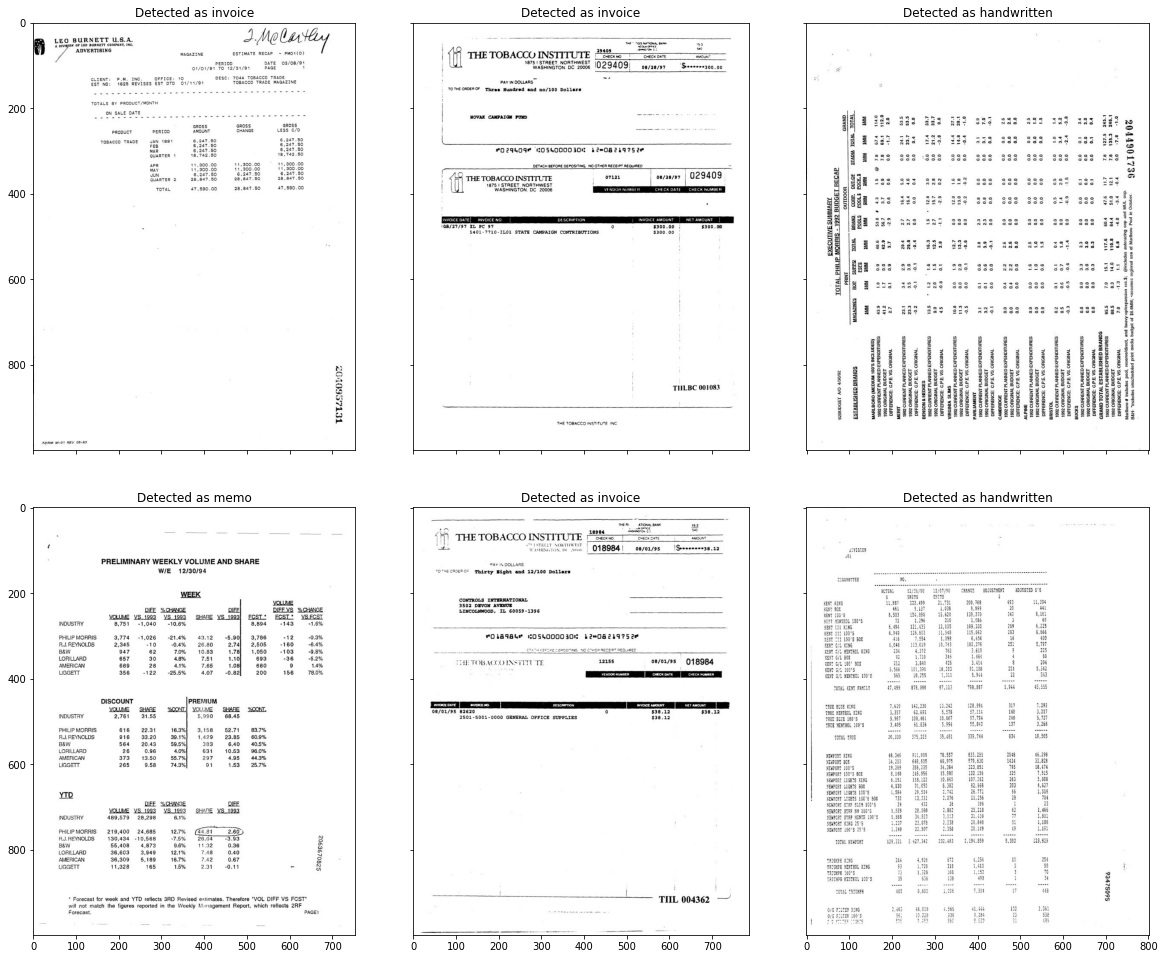

## Wrong predictions for form

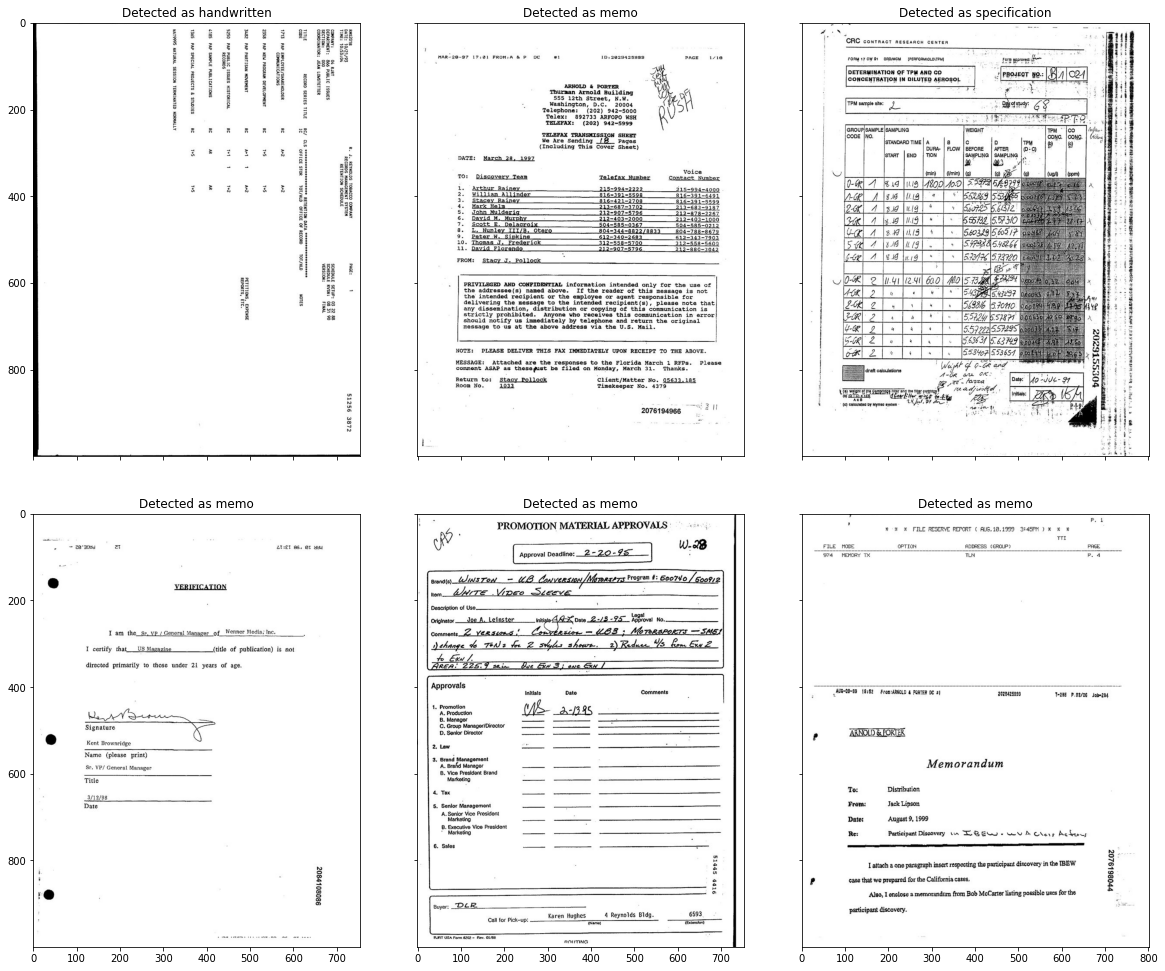

## Wrong predictions for scientific report

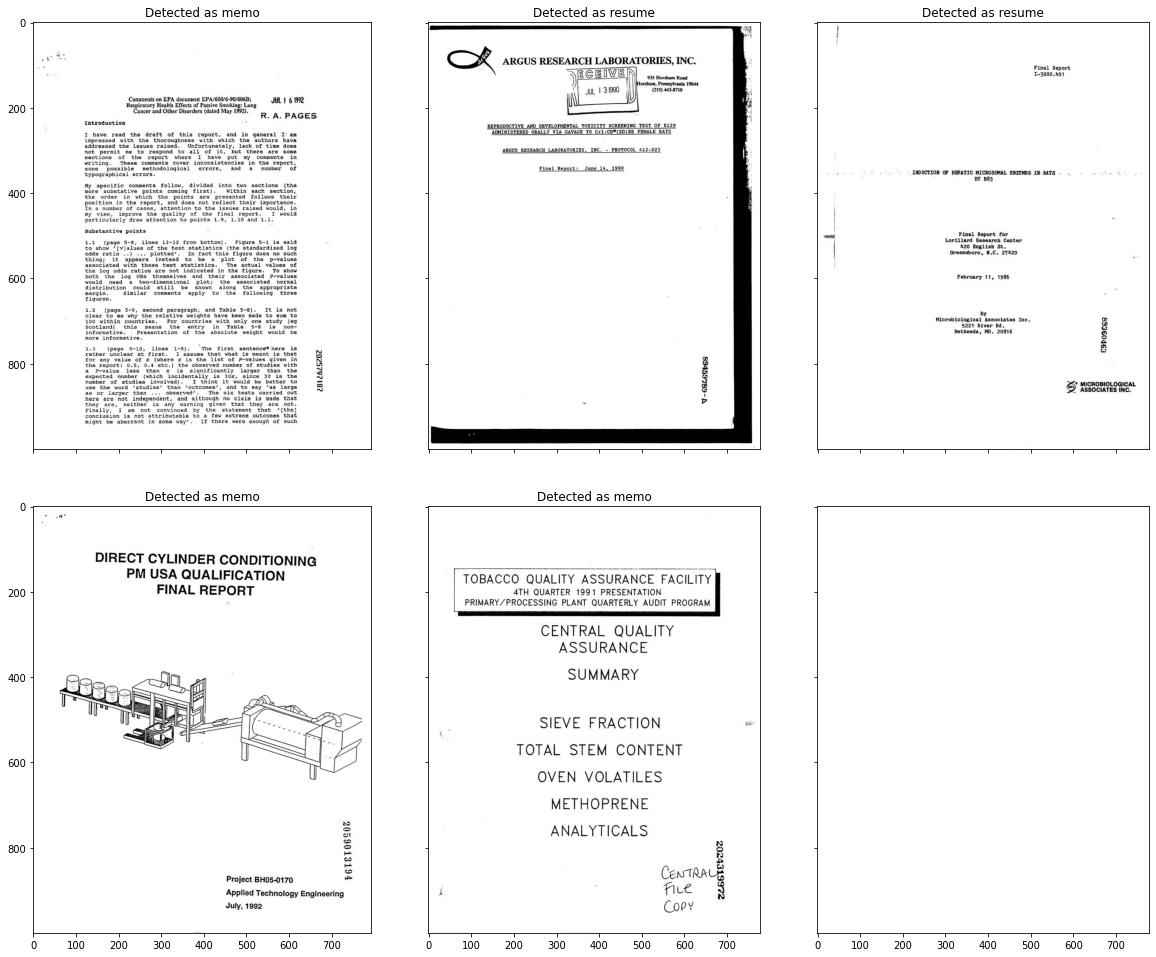

## Wrong predictions for residence proof

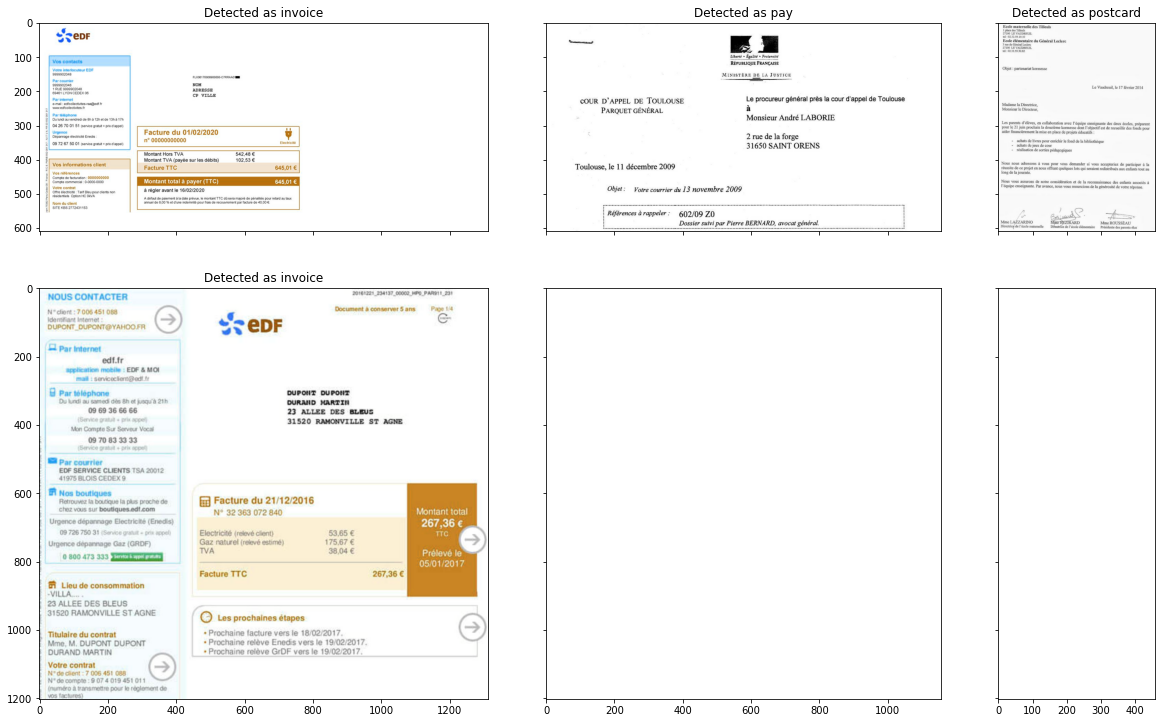

## Wrong predictions for handwritten

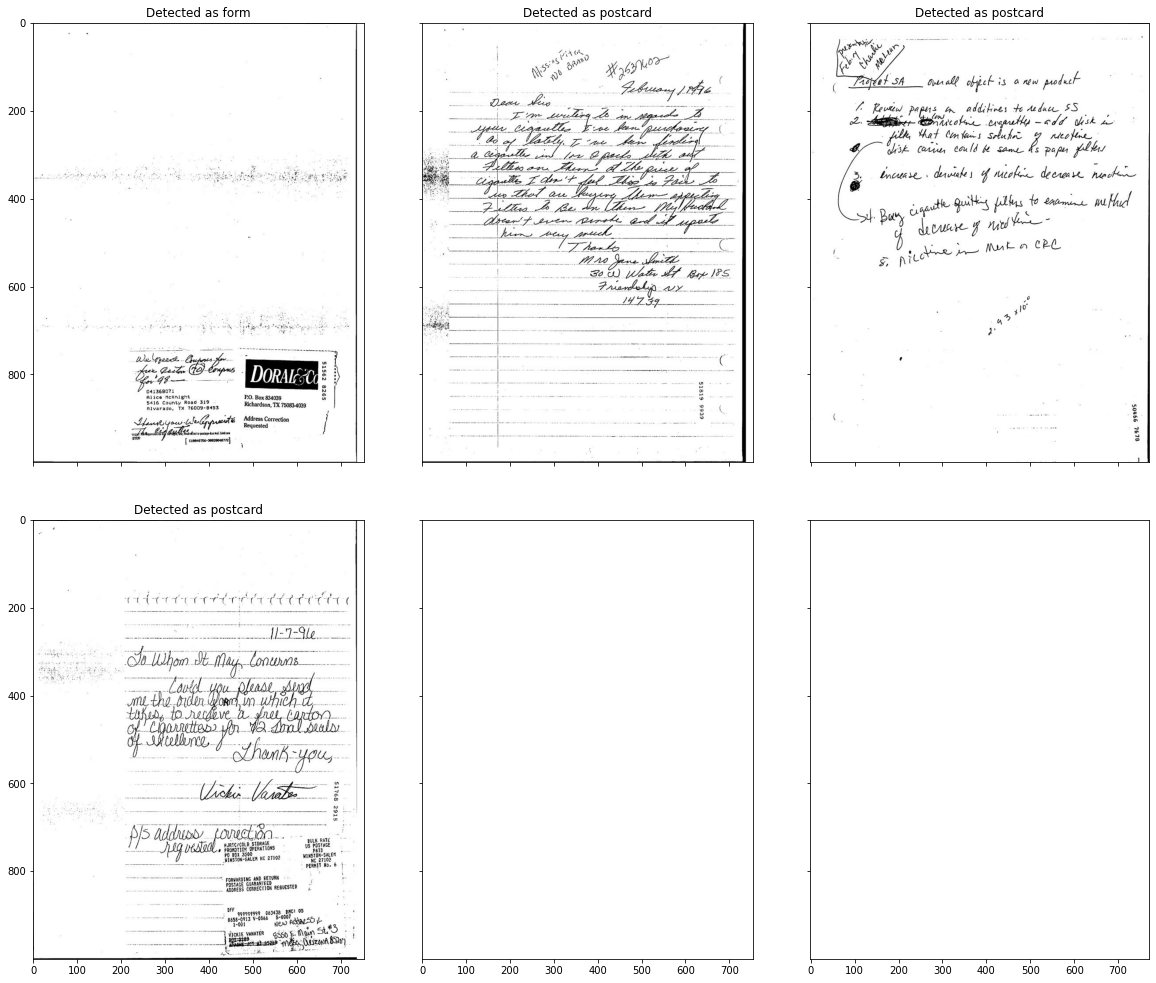

## Wrong predictions for scientific publication

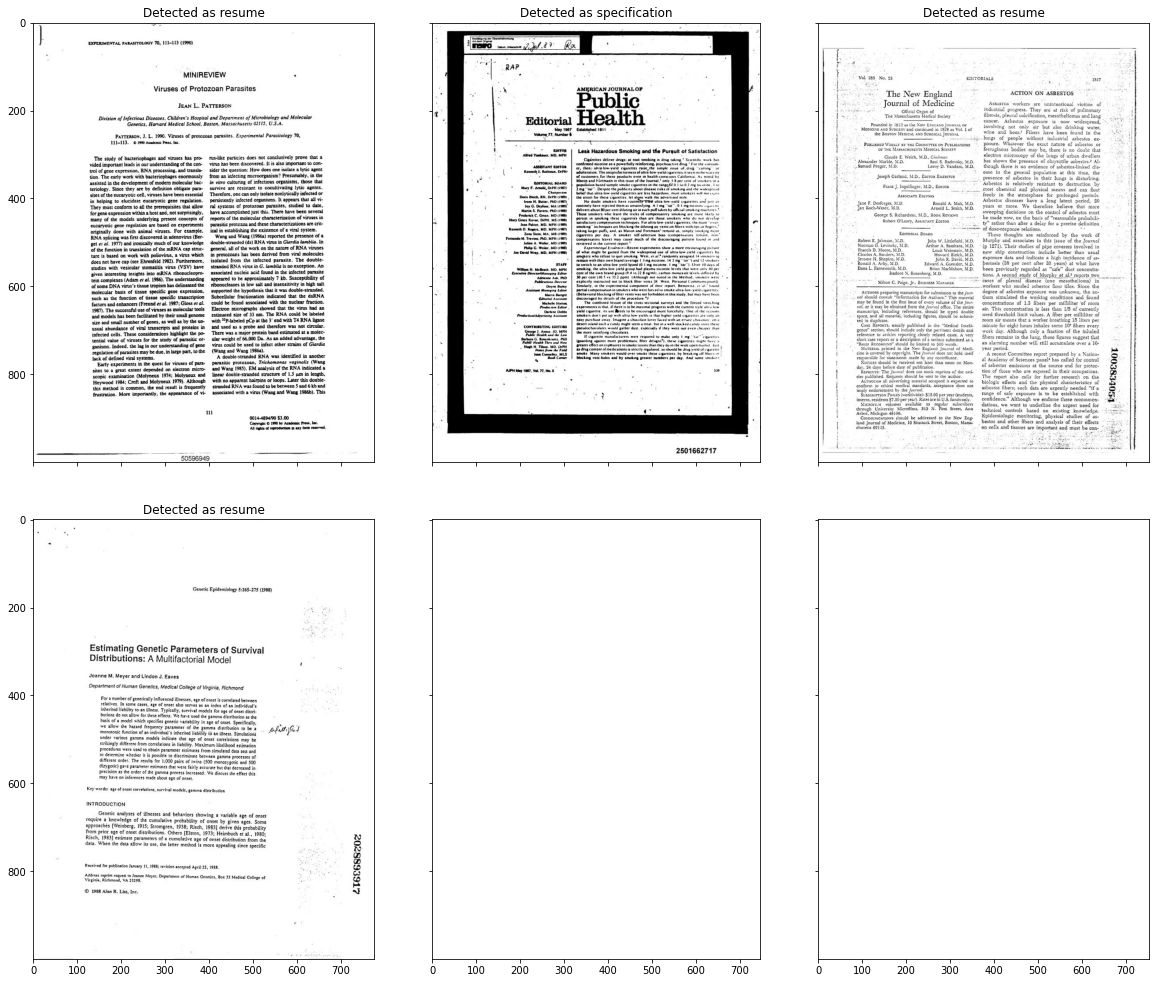

## Wrong predictions for postcard

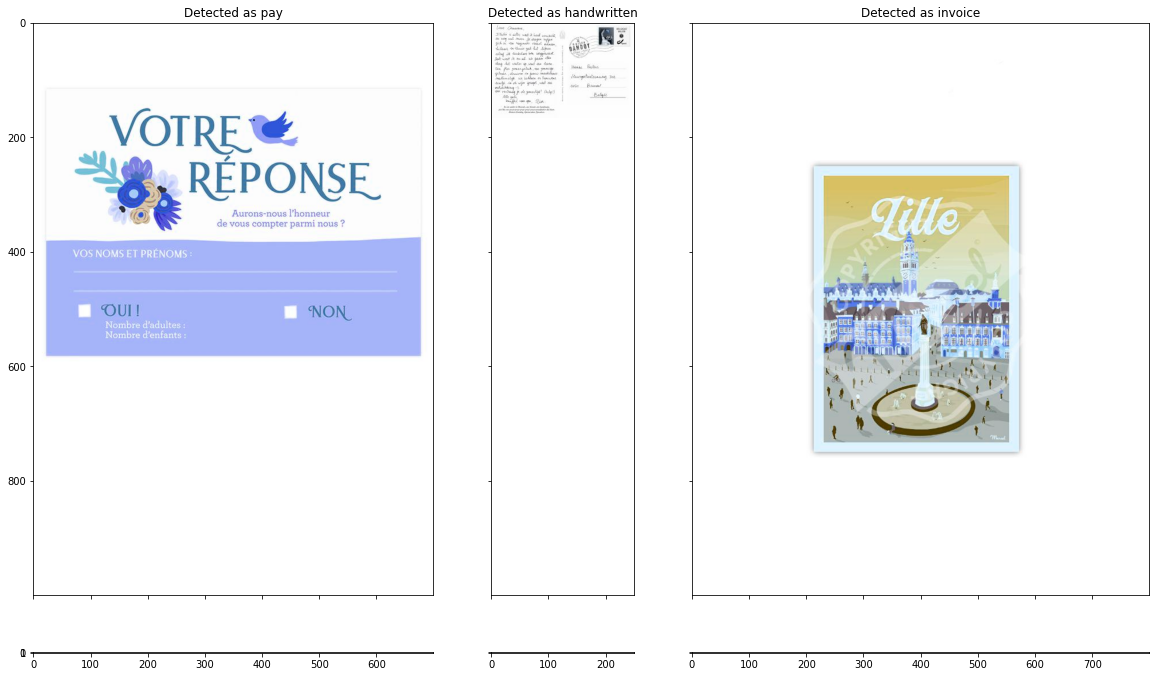

## Wrong predictions for news article

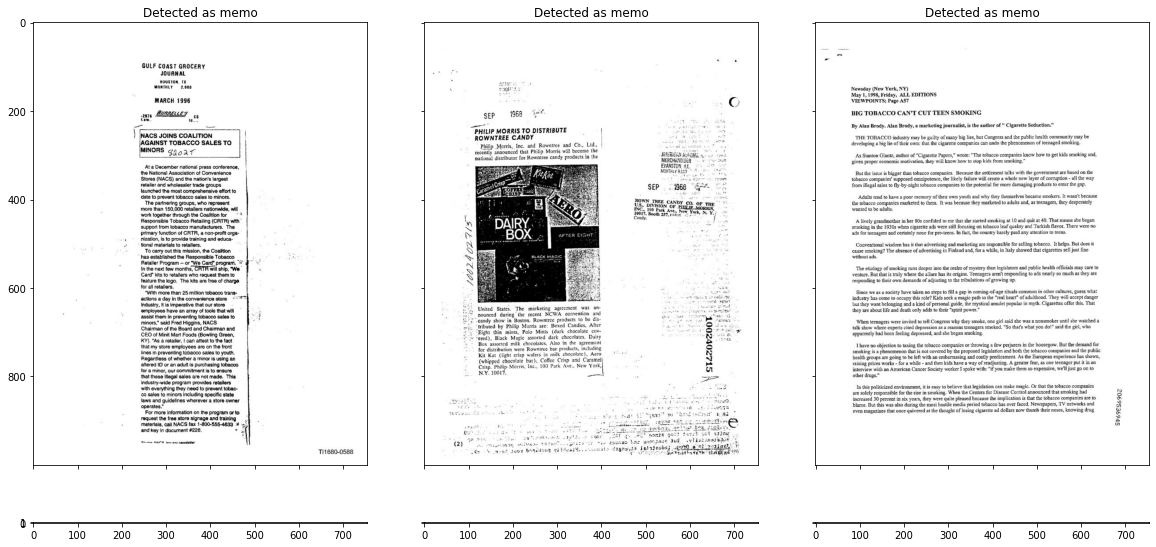

## Wrong predictions for id piece

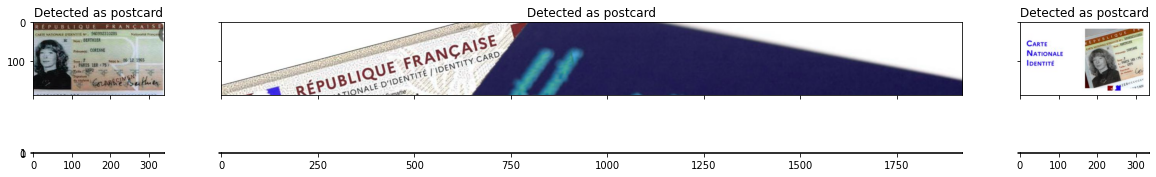

## Wrong predictions for resume

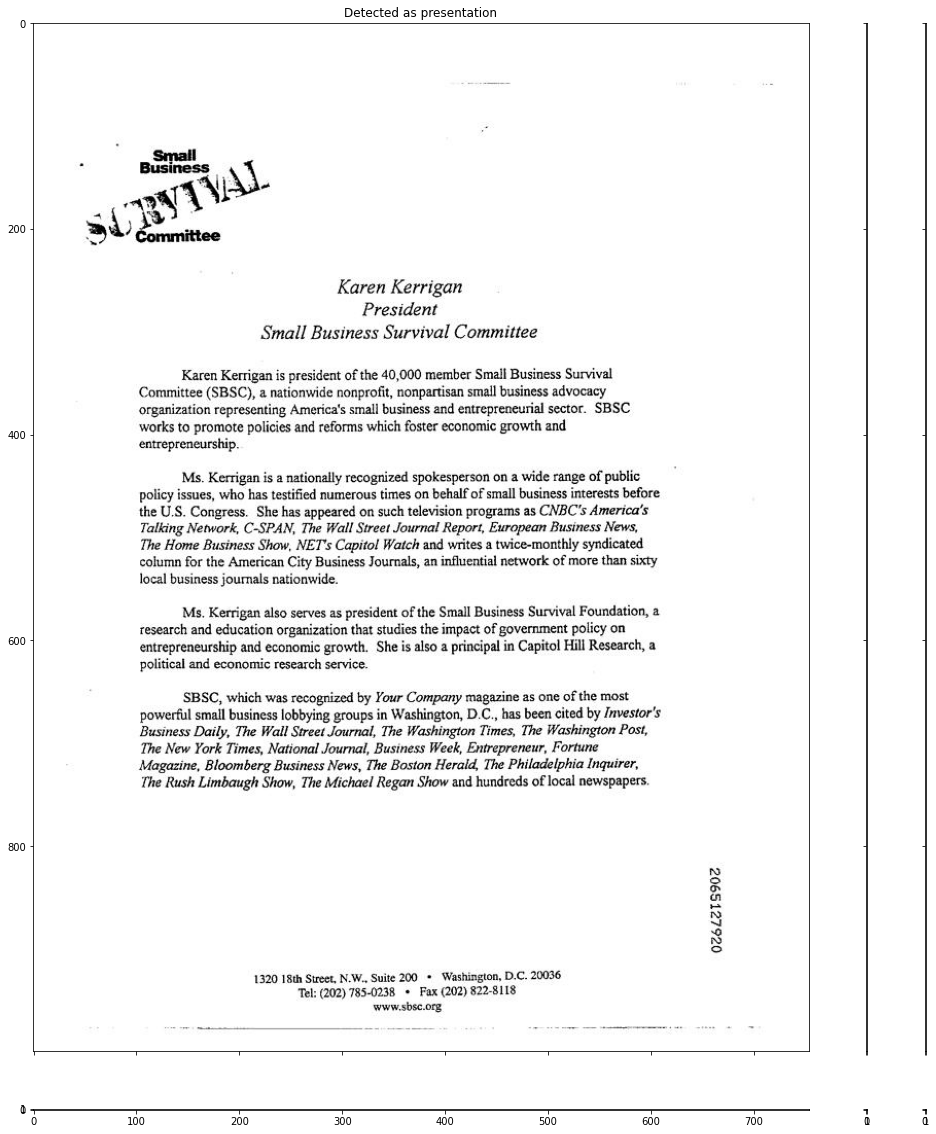

## Wrong predictions for invoice

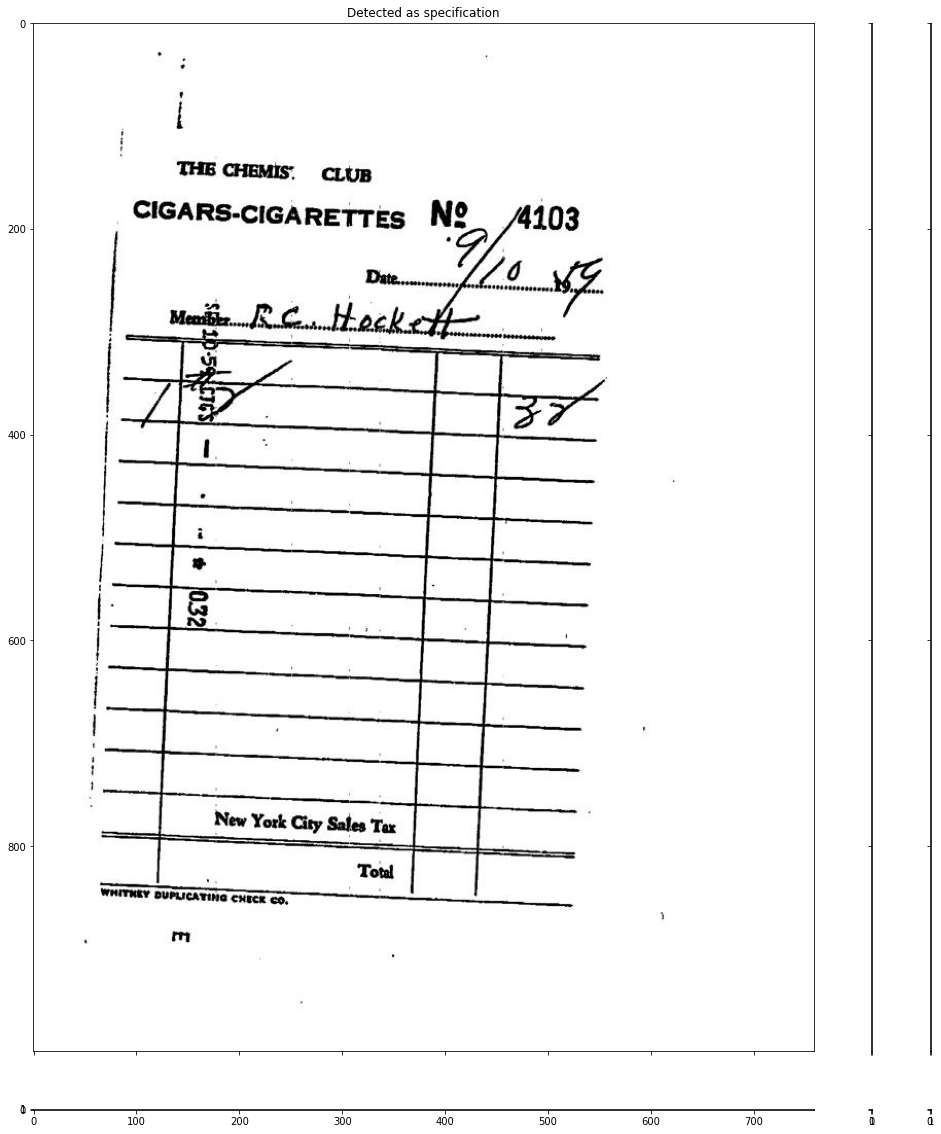

In [54]:
from helpers import read_image, printmd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1 import ImageGrid

def show_wrong_prediction(df,target): 
    fig = plt.figure(figsize=(20., 20.))
    
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.8,  # pad between axes in inch.
                 aspect = True
                 )
    printmd('## Wrong predictions for ' + df.iloc[0,:][target])
    for ax,(index,row) in zip(grid,df.iterrows()):
        ax.imshow(read_image(row['filename']))
        ax.set_title('Detected as ' + row['pred'])
        ax.grid(False)
    plt.show()  

def show_wrong_predictions(df,y_test,y_pred,X_test,target='type'):   
    
    X_result = df.loc[X_test.index,:][['filename', target]].copy()
    X_result['real'] = y_test
    X_result['pred'] = y_pred
    X_bad = X_result[X_result['pred']!=X_result['real']]
    
    fig = plt.figure(figsize=(10,10))
    sns.countplot(y=target,data=X_bad)
    plt.title('Wrong predictions count')
    plt.show()
    
    
    vc = pd.DataFrame(X_bad[target].value_counts()).head(20)
    for t in vc.index.tolist():
        show_wrong_prediction(X_bad[X_bad['target_en']==t],target)
        
        

from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(df['text_en'], df['target'], test_size=0.2,random_state=1234)

show_wrong_predictions(df,target_test, target_pred,XX_test,target='target_en')

